In [18]:
import zipfile as zf
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Data Preparation

Found image file: /kaggle/input/cartoonized-african/cartoonized-images/cartoon_images27.jpg


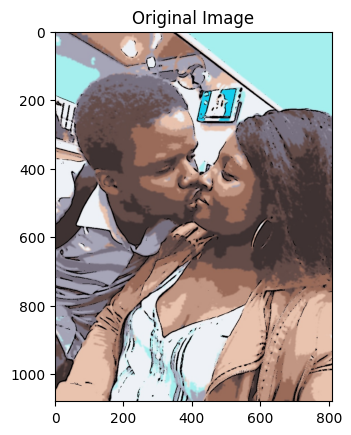

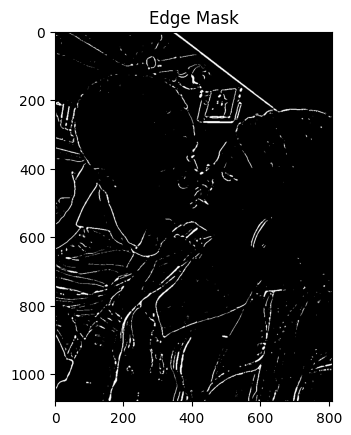

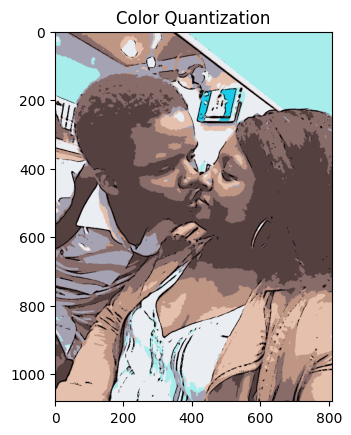

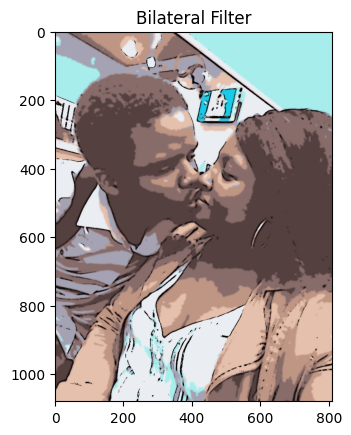

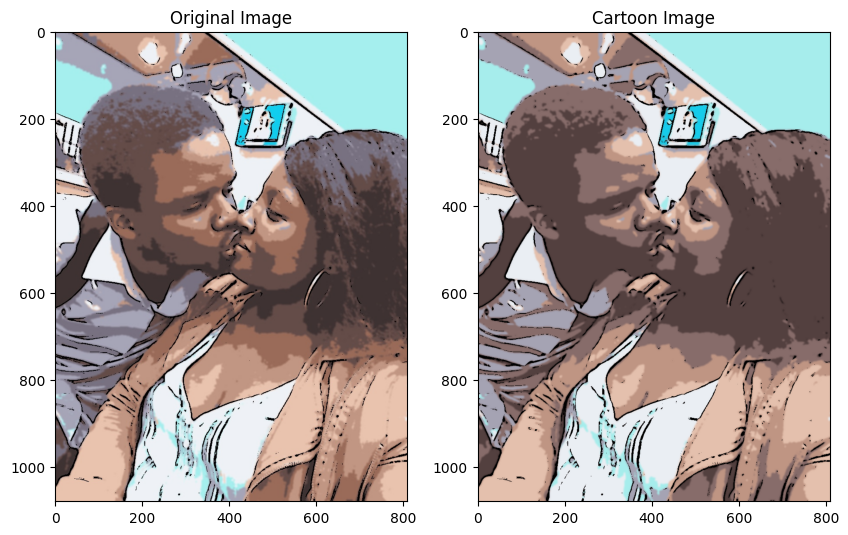

In [21]:

import zipfile as zf
import cv2
import numpy as np
from matplotlib import pyplot as plt


extracted_path = "/kaggle/input/cartoonized-african/cartoonized-images"



# Assuming the image file is directly inside the extracted folder and is the only .jpg file
import os
image_files = [f for f in os.listdir(extracted_path) if f.lower().endswith('.jpg')]
if image_files:
  image_path = os.path.join(extracted_path, image_files[0])
  print(f"Found image file: {image_path}")
else:
  print("No JPG image file found in the extracted directory.")
  exit()

image_path = "/kaggle/input/cartoonized-african/cartoonized-images/cartoon_WhatsApp Image 2024-12-19 at 22.49.02_5492e66c.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply cartoon effect
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.title('Original Image')
  plt.show()
  return img


img = read_file(image_path)
orig_image = np.copy(img)
# # Create Edge Mask
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges
line_size = 7
blur_value = 7
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap='binary')
plt.title('Edge Mask')
plt.show()
# # Reduce the color palette
def color_quantization(img, k):
  data = np.float32(img).reshape((-1, 3))
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

img = color_quantization(img, k=10)

plt.imshow(img)
plt.title('Color Quantization')
plt.show()
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=250,sigmaSpace=250)
plt.imshow(blurred)
plt.title('Bilateral Filter')
plt.show()
# # Combine edge with the quantized img
def cartoon():
  c = cv2.bitwise_and(blurred, blurred, mask=edges)
  plt.figure(figsize=(10,10))
  plt.subplot(1, 2, 1)
  plt.imshow(orig_image)
  plt.title('Original Image')
  plt.subplot(1, 2, 2)
  plt.imshow(c, cmap='gray')
  plt.title('Cartoon Image')
  plt.show()

cartoon()

In [ ]:
import zipfile as zf
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# Define paths
#path_to_zip_file = '/content/drive/MyDrive/cartoonize-image-project/image-to-cartoonize.zip'
extracted_path = '/kaggle/input/african-cartoonize/image-to-cartoonize'
output_path = '/kaggle/input/cartoonized-african/cartoonized-images'

# Create output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Extract the zip file
# with zf.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall(extracted_path)

# Get all .jpg image files in the extracted folder
image_files = [os.path.join(extracted_path, f) for f in os.listdir(extracted_path) if f.lower().endswith('.jpg')]

if not image_files:
    print("No JPG image files found in the extracted directory.")
    exit()

# Define functions

def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges

def color_quantization(img, k):
    data = np.float32(img).reshape((-1, 3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    _, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

def cartoonify_image(image_path, line_size=7, blur_value=7, k=10):
    # Read and preprocess image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    orig_image = np.copy(img)

    # Apply edge mask
    edges = edge_mask(img, line_size, blur_value)

    # Reduce color palette
    img = color_quantization(img, k)

    # Apply bilateral filter
    blurred = cv2.bilateralFilter(img, d=7, sigmaColor=250, sigmaSpace=250)

    # Combine edges with quantized image
    cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

    return orig_image, cartoon

# Process each image and save results
for image_path in image_files:
    print(f"Processing {image_path}...")
    orig_image, cartoon_image = cartoonify_image(image_path)

    # Display original and cartoonified image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(orig_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cartoon_image)
    plt.title('Cartoon Image')
    plt.axis('off')

    plt.show()

    # Save the cartoonified image
    image_name = os.path.basename(image_path)
    cartoon_path = os.path.join(output_path, f"cartoon_{image_name}")
    cartoon_image_bgr = cv2.cvtColor(cartoon_image, cv2.COLOR_RGB2BGR)  # Convert back to BGR for saving
    cv2.imwrite(cartoon_path, cartoon_image_bgr)

    print(f"Cartoonified image saved to {cartoon_path}")

print("All images have been processed and saved.")

# Modeling

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# GAN Model

def build_generator():
    model = tf.keras.Sequential([
        layers.Input(shape=(256, 256, 3)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'), # Added Conv2D to increase depth of network
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'), # Added Conv2D to increase depth of network
        layers.Conv2DTranspose(3, (4, 4), activation='tanh', strides=1, padding='same'),
    ])
    return model

def build_discriminator():
    model = tf.keras.Sequential([
        layers.Input(shape=(256, 256, 3)),
        layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', strides=2, padding='same'), # Added Conv2D to increase depth of network
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid'),
    ])
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(256, 256, 3))
    fake_image = generator(gan_input)
    gan_output = discriminator(fake_image)
    gan = tf.keras.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    return gan

# Load images for training
cartoon_images = [cv2.cvtColor(cv2.imread(os.path.join(output_path, f)), cv2.COLOR_BGR2RGB) for f in os.listdir(output_path)]
real_images = [cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB) for f in image_files]

# Preprocess images
cartoon_images = np.array([cv2.resize(img, (256, 256)) / 127.5 - 1 for img in cartoon_images])
real_images = np.array([cv2.resize(img, (256, 256)) / 127.5 - 1 for img in real_images])

# Initialize GAN models
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy')
gan = build_gan(generator, discriminator)


# Training loop
batch_size = 8
epochs = 1000
for epoch in range(epochs):
    # Select random batch
    idx = np.random.randint(0, real_images.shape[0], batch_size)
    real_imgs = real_images[idx]
    cartoon_imgs = cartoon_images[idx]

    # Generate fake images
    fake_imgs = generator.predict(real_imgs)

    # Train discriminator
    d_loss_real = discriminator.train_on_batch(cartoon_imgs, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    g_loss = gan.train_on_batch(real_imgs, np.ones((batch_size, 1)))

# Print losses
    #if epoch % 100 == 0:
        # Access the first element of g_loss (the actual loss value)
        #print(f"Epoch {epoch}/{epochs} | D Loss: {d_loss:.4f} | G Loss: {g_loss:.4f}")

# Save models
generator.save('/kaggle/working/generator_model.h5')
discriminator.save('/kaggle/working/discriminator_model.h5')
print("GAN training complete and models saved.")


# Evaluation

In [ ]:
from tensorflow.keras.applications import InceptionV3
from scipy.linalg import sqrtm

def calculate_fid(model, real_images, generated_images):
    # Compute embeddings
    real_embeddings = model.predict(real_images)
    generated_embeddings = model.predict(generated_images)

    # Compute statistics
    mu_real, sigma_real = real_embeddings.mean(axis=0), np.cov(real_embeddings, rowvar=False)
    mu_fake, sigma_fake = generated_embeddings.mean(axis=0), np.cov(generated_embeddings, rowvar=False)

    # Compute FID
    ssdiff = np.sum((mu_real - mu_fake) ** 2)
    covmean = sqrtm(sigma_real @ sigma_fake)
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = ssdiff + np.trace(sigma_real + sigma_fake - 2 * covmean)
    return fid

# Use InceptionV3 to extract features
inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(256, 256, 3))

# Calculate FID between cartoon_images and generated_images
fake_images = generator.predict(real_images)
fid = calculate_fid(inception_model, cartoon_images, fake_images)
print(f"FID Score: {fid}")


# Testing

In [ ]:
# Load models
from tensorflow.keras.models import load_model

generator_path = '/kaggle/working/generator_model.h5'
discriminator_path = '/kaggle/working/discriminator_model.h5'

generator = load_model(generator_path)
discriminator = load_model(discriminator_path)

# Test generator with random noise
sample_input = np.random.randn(1, 256, 256, 3)  # Random noise
generated_image = generator.predict(sample_input)

# Display generated image
plt.imshow((generated_image[0] + 1) / 2)  # Rescale to [0, 1] for visualization
plt.title("Generated Image by Generator")
plt.axis("off")
plt.show()

# Test discriminator with real and generated images
real_test_image = real_images[0:1]  # A real image from the dataset
fake_test_image = generated_image   # The generated image

disc_real_output = discriminator.predict(real_test_image)
disc_fake_output = discriminator.predict(fake_test_image)

print(f"Discriminator output for real image: {disc_real_output}")
print(f"Discriminator output for fake image: {disc_fake_output}")


# Deployment